In [214]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [215]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, silhouette_score 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

In [216]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-5-hcv.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [217]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [218]:
mean_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')

data[['ALP', 'CHOL', 'ALB', 'ALT', 'PROT']] = mean_imp.fit_transform(data[['ALP', 'CHOL', 'ALB', 'ALT', 'PROT']])

In [219]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [220]:
data.duplicated().sum()

0

In [221]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


<AxesSubplot:title={'center':'Correlation Matrix'}>

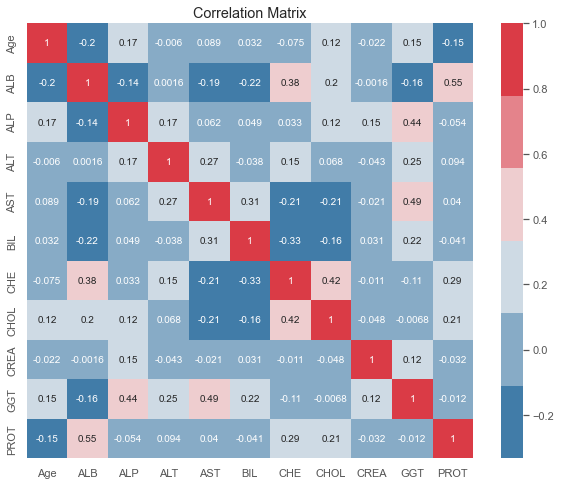

In [222]:
data_corr = data.corr()


f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10), annot=True)

In [223]:
le = LabelEncoder()

y = data.Category 

y_true = le.fit_transform(y)

data = pd.get_dummies(data,dtype=float)

le.classes_

n_clusters = len(le.classes_)

In [224]:
preprocessor = Pipeline( 
    [ 
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=2))
    ]
)

In [225]:
clusterer = Pipeline( 
    [ 
        (
            'kmeans',
            KMeans( 
                n_clusters=n_clusters,
                init='k-means++',
                n_init=50,
                max_iter=500,
                random_state=42,
            )
        )
    ]
)

In [226]:
pipe = Pipeline( 
    [ 
        ('preprocessor', preprocessor),
        ('clusterer',clusterer)
    ]
)

In [227]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [228]:
preprocessed_data = pipe['preprocessor'].transform(data)

predicted_labels = pipe['clusterer']['kmeans'].labels_

In [229]:
# data['predicted_labels'] = predicted_labels

# data

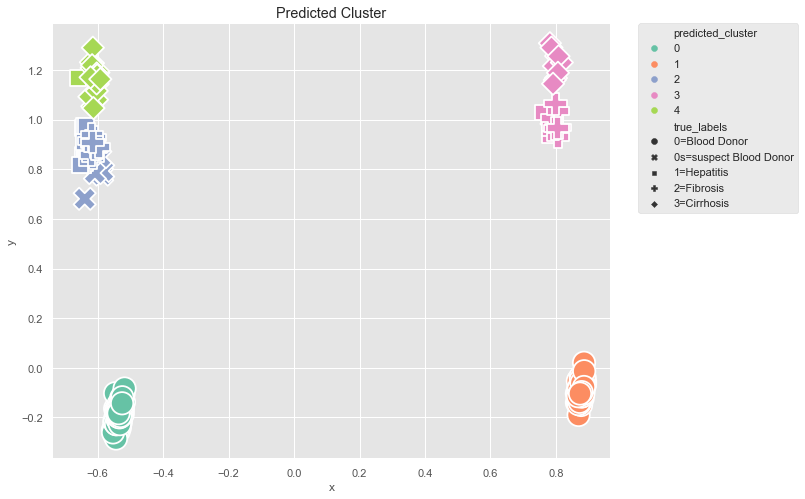

In [230]:
pcdaf = pd.DataFrame( 
    preprocessed_data, columns=['x', 'y']
)

pcdaf['predicted_cluster'] = predicted_labels
pcdaf['true_labels'] = le.inverse_transform(y_true)

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Predicted Cluster')

scatt = sns.scatterplot( 
    data=pcdaf,
    s=500,
    x='x',
    y='y',
    hue='predicted_cluster',
    style='true_labels',
    palette='Set2'
)

scatt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)